# Application example
This is simple example of how to use the estimated connectivity models to make predictions about the cerebellar activity pattern for new data. 

The example uses the `Functional_Fusion` repository to read out gifti/nifti files at the predefined voxel locations (atlas). 

Finally, it uses the the `SUITPy` to visualize the observed and predicted activity patterns.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.model as model
import Functional_Fusion.atlas_map as am 
import Functional_Fusion.dataset as ds
import nibabel as nb

import SUITPy as suit

##  Read the cortical data 
The data needs to be read into the correct atlas space and parcellation
As an example, we are using MDTB group-averaged data from the first session. 

The correct sampling of the data is taken care of by the `Functional_Fusion` repository.

In [10]:
# Define and atlas and read the data 
cortex_atlas,_  = am.get_atlas('fs32k')
cifti_img = nb.load('../data/group_space-fs32k_ses-s1_CondAll.dscalar.nii')
D=cortex_atlas.read_data(cifti_img)
print(f'The data is {D.shape[0]} conditions by {D.shape[1]} surface vertices')

The data is 29 conditions by 59518 surface vertices


In [14]:
# The data needs to now be averaged within the cortical regions
adir = am.default_atlas_dir
cortex_roi = [f"{adir}/tpl-fs32k/Icosahedron1002.L.label.gii",
               f"{adir}/tpl-fs32k/Icosahedron1002.R.label.gii"]
# Read the ROI files
label_vec,labels = cortex_atlas.get_parcel(cortex_roi)

# Aggregate the data within the regions
Dn,_ = ds.agg_parcels(D,label_vec,fcn=np.nanmean)
print(f'The aggregated data is {Dn.shape[0]} conditions by {Dn.shape[1]} ROIs vertices')

The aggregated data is 29 conditions by 1876 ROIs vertices


##  Get the connectivity model

Text(0, 0.5, 'Cortical ROI')

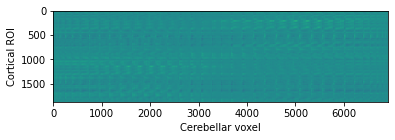

In [20]:
M = model.Model('my_model')
M.from_cifti('../data/Nettekoven_2024_Fusion_L2.pdconn.nii')
# Plot the connectivity matrix 
plt.imshow(M.coef_.T)
plt.xlabel('Cerebellar voxel')
plt.ylabel('Cortical ROI')

## Make the prediction from the model

In [21]:
Y_hat = M.predict(Dn)

## Load the real data for comparison

In [23]:
cereb_atlas,_ = am.get_atlas('SUIT3')
cifti_img = nb.load('../data/group_space-SUIT3_ses-s1_CondAll.dscalar.nii')
Y = cereb_atlas.read_data(cifti_img)

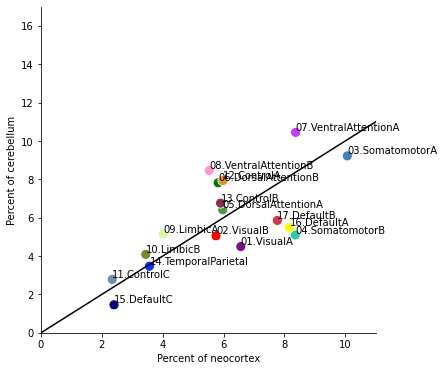

In [19]:
## Plot real and predicted data

In [7]:
T2,colors = csw.get_weight_by_cortex(dataset_name='HCP',extension='A-2')

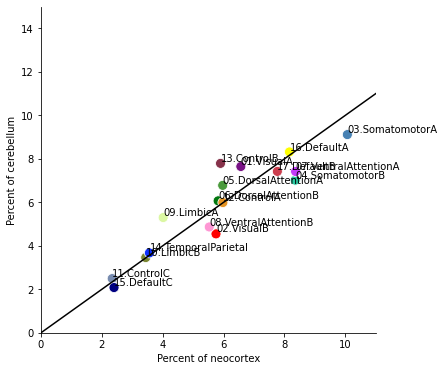

In [8]:
plot_figure(T2,colors)

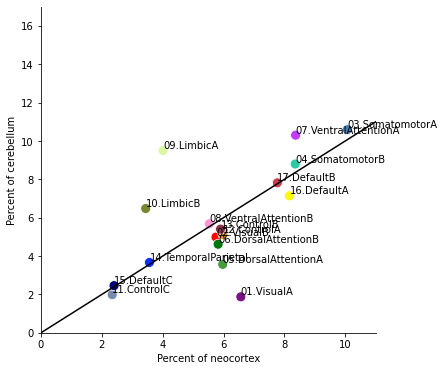

In [20]:
T3,colors = csw.get_weight_by_cortex(dataset_name='MDTB',extension='A6')
plot_figure(T3,colors)